In [1]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union


from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation

In [23]:
#Laplace
x = np.linspace(0, 1, 32)
y = np.linspace(0, 1, 32)
grid_x = np.linspace(0, 1, 32)
grid_y = np.linspace(0, 1, 32)
data = np.load('data_laplace_noise0.01.npy')
dx = 1 / 32
dy = 1 / 32


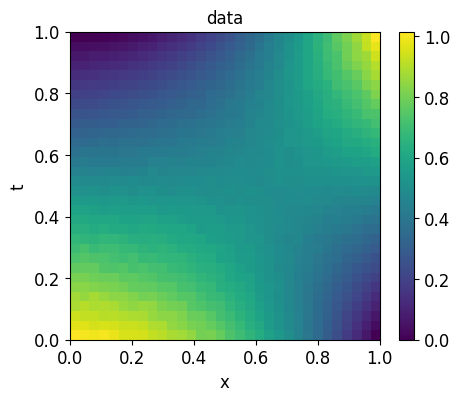

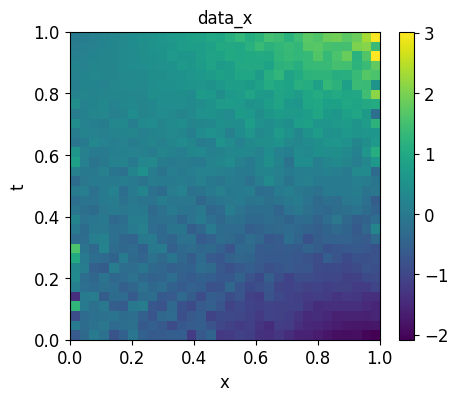

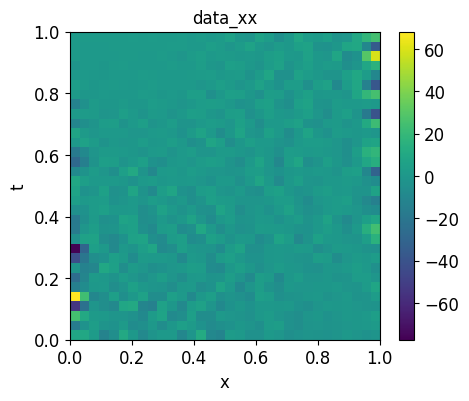

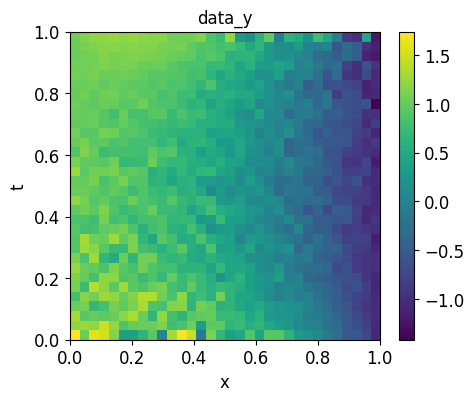

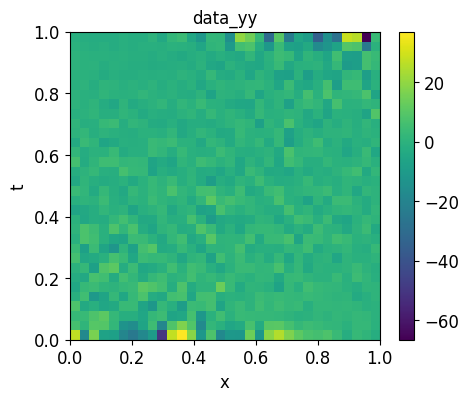

In [24]:
gradient_x = np.gradient(data, dx, axis=1, edge_order=2) 
gradient_y = np.gradient(data, dy, axis=0, edge_order=2)

gradient_xx = np.gradient(gradient_x, dx, axis = 1, edge_order=2)
gradient_yy = np.gradient(gradient_y, dy, axis = 0, edge_order=2)

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_y, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_y')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_yy, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_yy')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [25]:
np.save('Laplace_Gradient_x_noise0.01.npy', gradient_x)
np.save('Laplace_Gradient_xx_noise0.01.npy', gradient_xx)
np.save('Laplace_Gradient_y_noise0.01.npy', gradient_y)
np.save('Laplace_Gradient_yy_noise0.01.npy', gradient_yy)


(32, 32)
(32,)
(32,)


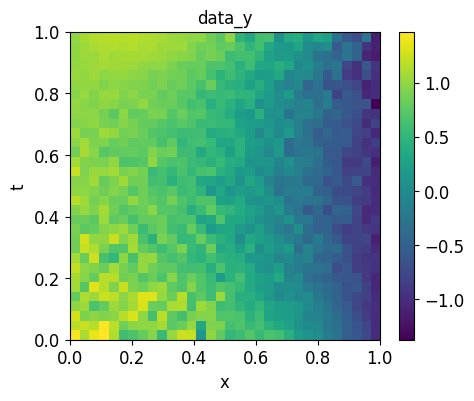

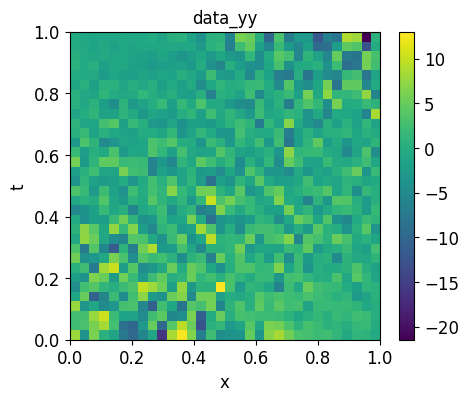

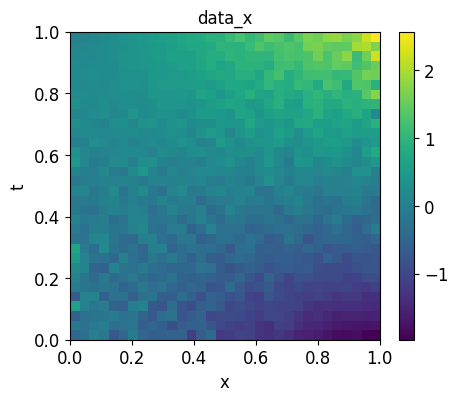

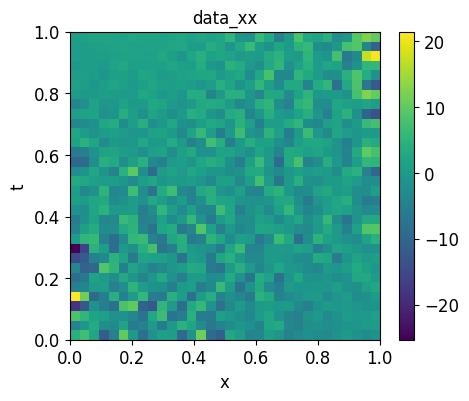

In [26]:
print(data.shape)
print(grid_x.shape)
print(grid_y.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2, 2]
mixed = False  

derivatives = derivative_calculator(data, [grid_x, grid_y], max_order, mixed).reshape(32, 32, 4)

derivatives1 = derivative_calculator(derivatives[:, :, 1], [grid_x, grid_y], max_order, mixed).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_y)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_y')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_yy')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [27]:
np.save('Laplace_Adaptive_y_noise0.01.npy', derivatives[:, :, 0])
np.save('Laplace_Adaptive_yy_noise0.01.npy', derivatives[:, :, 1])
np.save('Laplace_Adaptive_x_noise0.01.npy', derivatives[:, :, 2])
np.save('Laplace_Adaptive_xx_noise0.01.npy', derivatives[:, :, 3])


In [28]:
print(data.shape)
print(grid_x.shape)
print(grid_y.shape)

(32, 32)
(32,)
(32,)


1024
1024


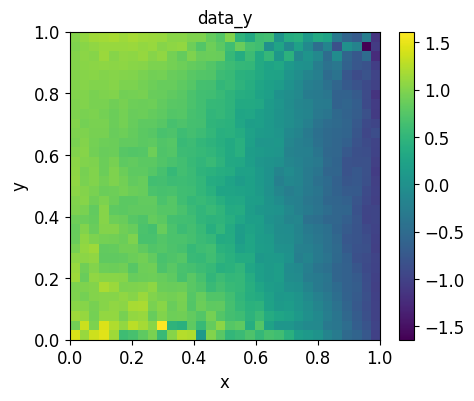

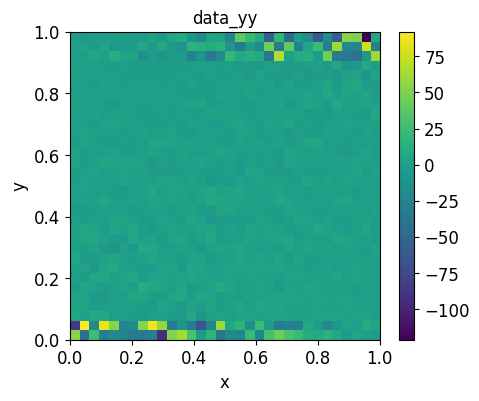

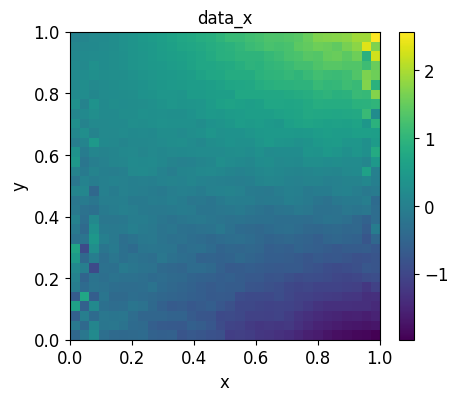

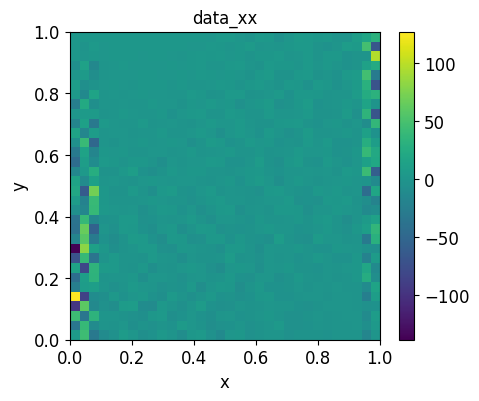

In [29]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = np.meshgrid(grid_y, grid_x, indexing='ij')
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)
derivatives1 = derivative_calculator(derivatives[:, :, 1], grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_y)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_yy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
np.save('Laplace_Polynomial_y_noise0.01.npy', derivatives[:, :, 0])
np.save('Laplace_Polynomial_yy_noise0.01.npy', derivatives[:, :, 1])
np.save('Laplace_Polynomial_x_noise0.01.npy', derivatives[:, :, 2])
np.save('Laplace_Polynomial_xx_noise0.01.npy', derivatives[:, :, 3])

(32, 32)
2
[array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ]), array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ])]


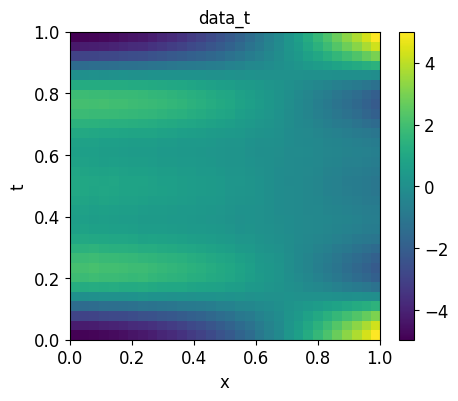

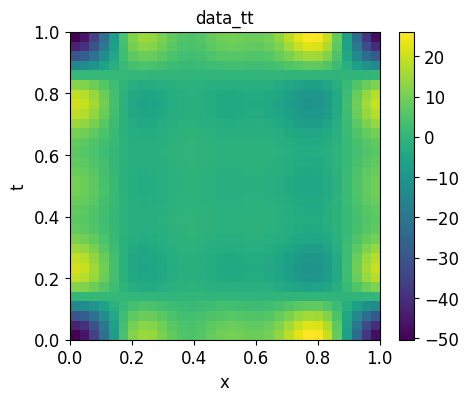

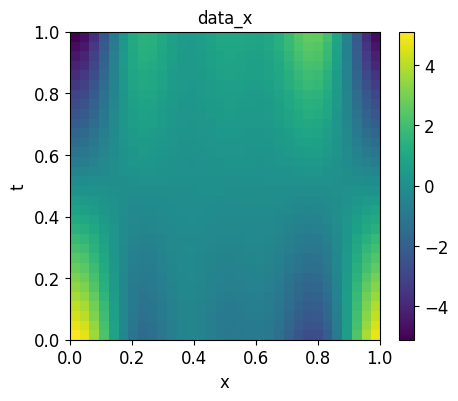

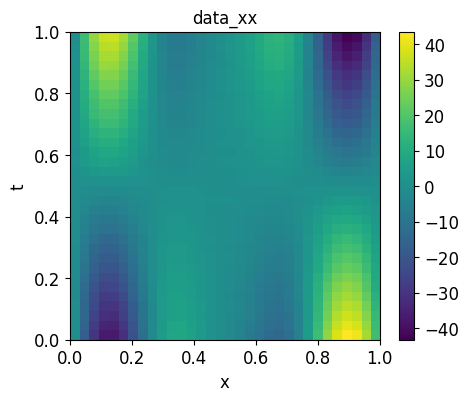

In [31]:
grid = [grid_y, grid_x]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_nd(data, grid, n=7, steepness=10)
derivatives1 = derivative_calculator.spectral_derivative_nd(derivatives[0][1], grid, n=7, steepness=10)
derivatives2 = derivative_calculator.spectral_derivative_nd(derivatives[1][1], grid, n=7, steepness=10)
derivatives3 = derivative_calculator.spectral_derivative_nd(derivatives1[0][1], grid, n=7, steepness=10)

Y, X = np.meshgrid(grid_y, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [32]:
np.save('Laplace_Spectral_y_noise0.01.npy', derivatives[0][1])
np.save('Laplace_Spectral_yy_noise0.01.npy', derivatives2[0][1])
np.save('Laplace_Spectral_x_noise0.01.npy', derivatives[1][1])
np.save('Laplace_Spectral_xx_noise0.01.npy', derivatives2[1][1])

For some reason has to be abysmal: (-55.42159396900605, 511.81307180083047)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
For some reason has to be abysmal: (-11.809645804540754, 12.934900416541883)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55

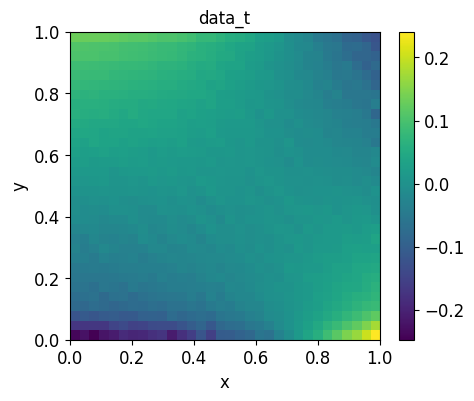

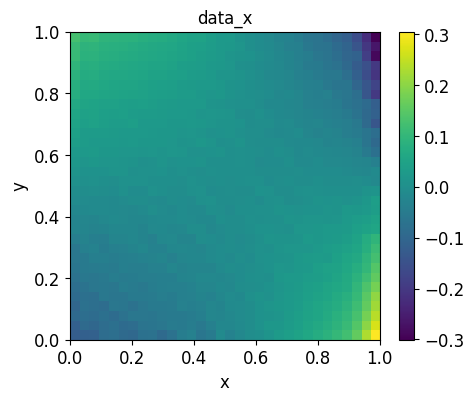

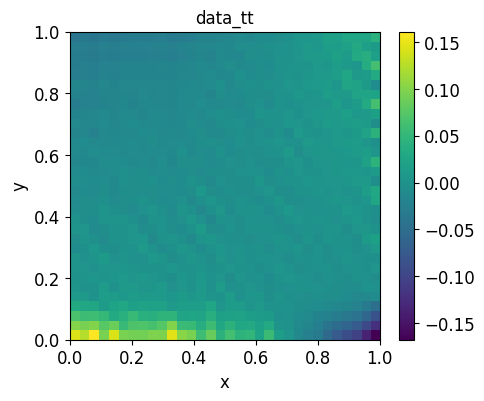

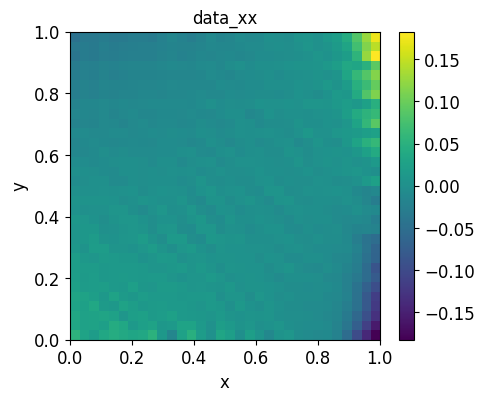

In [33]:
lbd = 100
reg_strng = 10
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[0, :, :], lbd, reg_strng, c_const)
derivatives3 = derivative_calculator.optimize_with_admm(derivatives1[1, :, :], lbd, reg_strng, c_const)
#derivatives4 = derivative_calculator.optimize_with_admm(derivatives2[0, :, :], lbd, reg_strng, c_const)#третья производная

Y, X = np.meshgrid(grid_y, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives3[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
np.save('Laplace_Total_x_noise0.01.npy', derivatives1[1, :, :])
np.save('Laplace_Total_xx_noise0.01.npy', derivatives3[1, :, :])
np.save('Laplace_Total_y_noise0.01.npy', derivatives1[0, :, :])
np.save('Laplace_Total_yy_noise0.01.npy', derivatives2[0, :, :])

Mean Squared Error (MSE) for noise level 0:
  u_xx: 0.012412443352734923
  u_yy: 0.08144498094267026
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 3.755467550074158
  u_yy: 5.456329339667079
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 15.271546034925386
  u_yy: 10.372472946423446


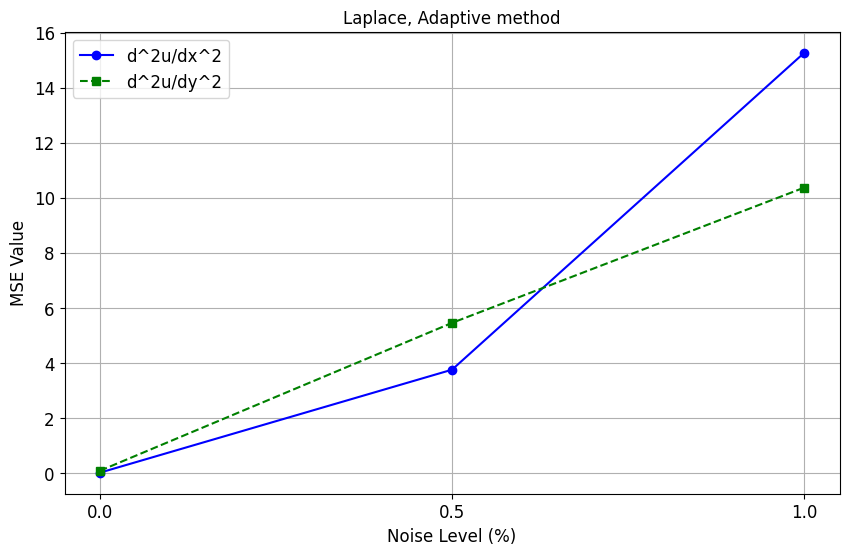

In [3]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_yy = []

for noise in noise_levels:
    u_xx = np.load(f'Laplace_Gradient_xx_noise{noise}.npy')
    u_yy = np.load(f'Laplace_Gradient_yy_noise{noise}.npy')
    
    gradient_xx = np.load(f'Laplace_Adaptive_xx_noise{noise}.npy')
    gradient_yy = np.load(f'Laplace_Adaptive_yy_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_yy = calculate_mse(u_yy, gradient_yy)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_yy.append(mse_u_yy)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_yy: {mse_u_yy}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_yy, marker='s', linestyle='--', color='g', label='d^2u/dy^2')

plt.title('Laplace, Adaptive method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Laplace_Adaptive_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 0.005781164296081611
  u_yy: 0.003589507354556096
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 38.49664280029042
  u_yy: 41.98907832505067
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 126.92827505170672
  u_yy: 123.29545441346875


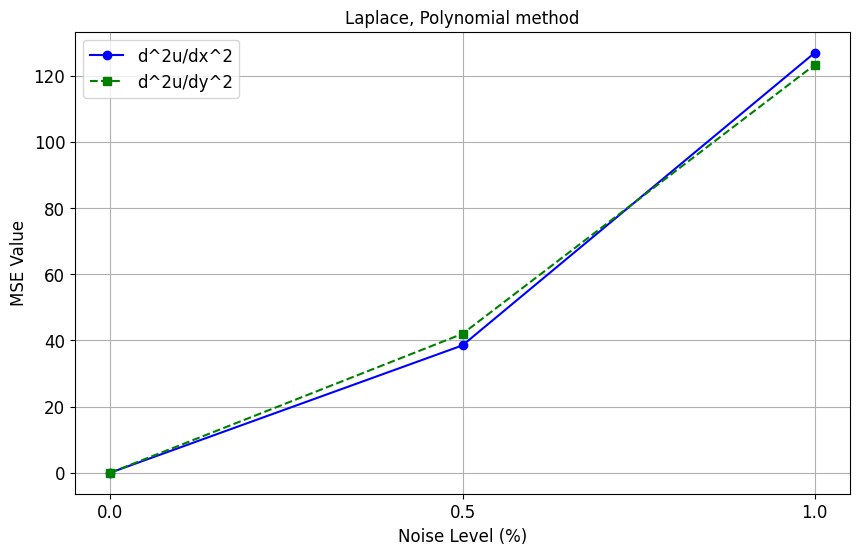

In [4]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_yy = []

for noise in noise_levels:
    u_xx = np.load(f'Laplace_Gradient_xx_noise{noise}.npy')
    u_yy = np.load(f'Laplace_Gradient_yy_noise{noise}.npy')
    
    gradient_xx = np.load(f'Laplace_Polynomial_xx_noise{noise}.npy')
    gradient_yy = np.load(f'Laplace_Polynomial_yy_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_yy = calculate_mse(u_yy, gradient_yy)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_yy.append(mse_u_yy)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_yy: {mse_u_yy}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_yy, marker='s', linestyle='--', color='g', label='d^2u/dy^2')

plt.title('Laplace, Polynomial method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Laplace_Polynomial_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 152.63780538270913
  u_yy: 87.81299188994248
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 165.17372019208045
  u_yy: 108.42587414124267
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 203.16539523171514
  u_yy: 128.00337868071267


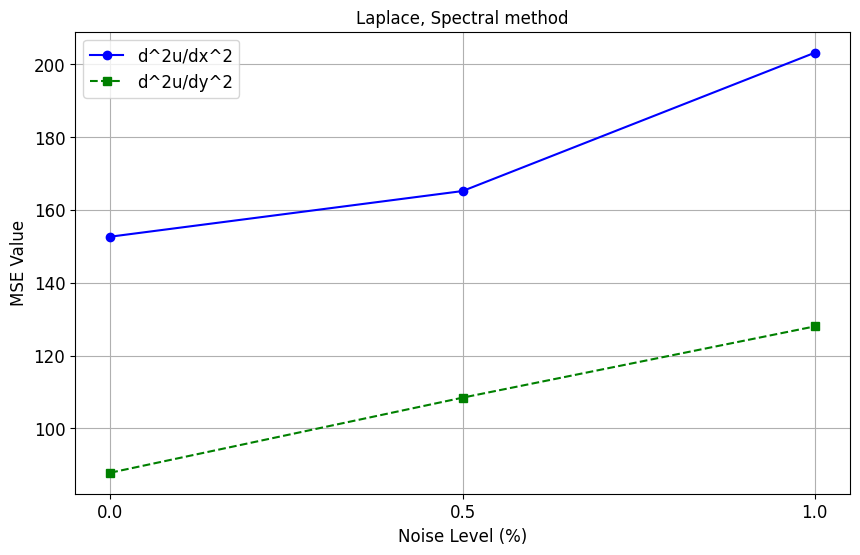

In [5]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_yy = []

for noise in noise_levels:
    u_xx = np.load(f'Laplace_Gradient_xx_noise{noise}.npy')
    u_yy = np.load(f'Laplace_Gradient_yy_noise{noise}.npy')
    
    gradient_xx = np.load(f'Laplace_Spectral_xx_noise{noise}.npy')
    gradient_yy = np.load(f'Laplace_Spectral_yy_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_yy = calculate_mse(u_yy, gradient_yy)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_yy.append(mse_u_yy)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_yy: {mse_u_yy}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_yy, marker='s', linestyle='--', color='g', label='d^2u/dy^2')

plt.title('Laplace, Spectral method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Laplace_Spectral_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 0.009752831058112477
  u_yy: 0.17799504834825103
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 3138.8937548212166
  u_yy: 426.19782834002575
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 4647.440140811668
  u_yy: 94205.9511453812


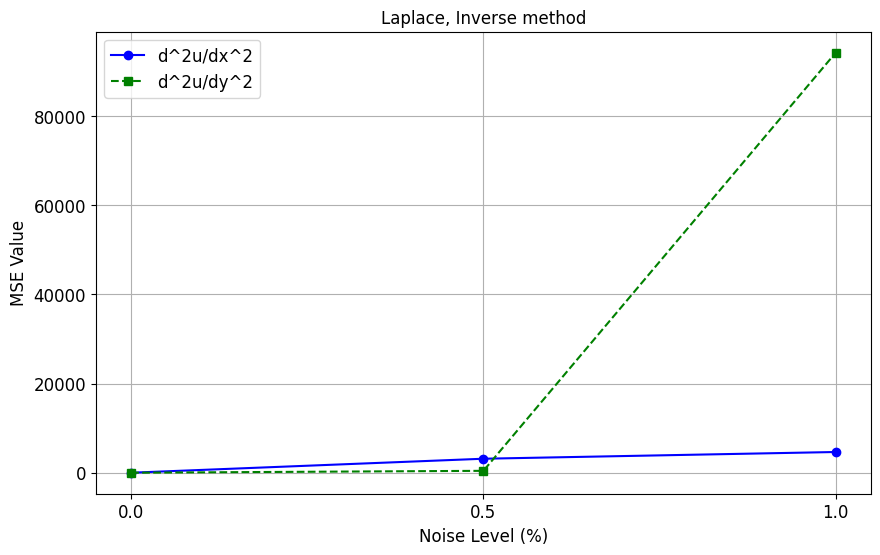

: 

In [ ]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_yy = []

for noise in noise_levels:
    u_xx = np.load(f'Laplace_Gradient_xx_noise{noise}.npy')
    u_yy = np.load(f'Laplace_Gradient_yy_noise{noise}.npy')
    
    gradient_xx = np.load(f'Laplace_Inverse_xx_noise{noise}.npy')
    gradient_yy = np.load(f'Laplace_Inverse_yy_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_yy = calculate_mse(u_yy, gradient_yy)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_yy.append(mse_u_yy)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_yy: {mse_u_yy}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_yy, marker='s', linestyle='--', color='g', label='d^2u/dy^2')

plt.title('Laplace, Inverse method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Laplace_Inverse_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 1.0941310595135199
  u_yy: 0.9853186366072453
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 12.478879140637368
  u_yy: 15.774395421705506
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 49.83411173675988
  u_yy: 35.476106082422575


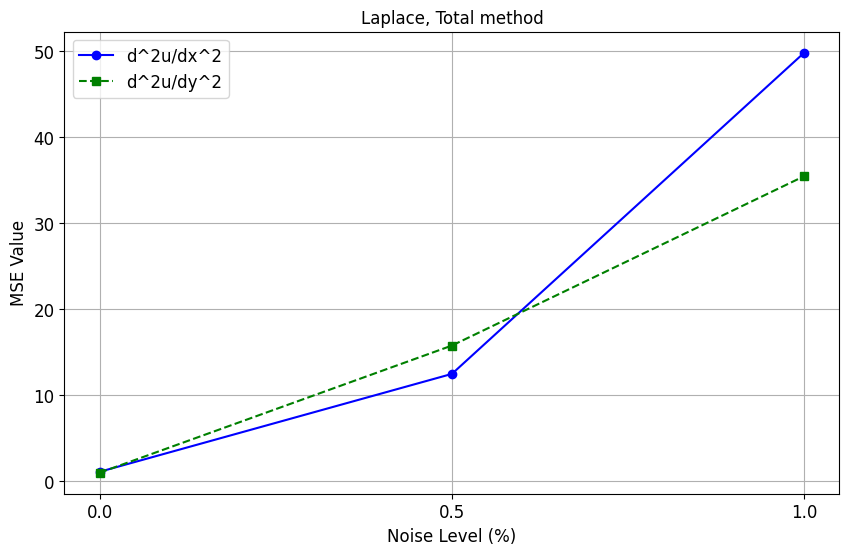

In [6]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_yy = []

for noise in noise_levels:
    u_xx = np.load(f'Laplace_Gradient_xx_noise{noise}.npy')
    u_yy = np.load(f'Laplace_Gradient_yy_noise{noise}.npy')
    
    gradient_xx = np.load(f'Laplace_Total_xx_noise{noise}.npy')
    gradient_yy = np.load(f'Laplace_Total_yy_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_yy = calculate_mse(u_yy, gradient_yy)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_yy.append(mse_u_yy)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_yy: {mse_u_yy}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_yy, marker='s', linestyle='--', color='g', label='d^2u/dy^2')

plt.title('Laplace, Total method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Laplace_Total_error.pdf', format='pdf')
plt.show()
